# k-nn 알고리즘

In [1]:
# import os
# from google.colab import drive
# drive.mount('/content/drive')
# os.chdir('/content/drive/MyDrive/Colab Notebooks/데이터마이닝_2024/예제 데이터')
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('RidingMowers.csv')
df1

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner
5,110.1,19.2,Owner
6,108.0,17.6,Owner
7,82.8,22.4,Owner
8,69.0,20.0,Owner
9,93.0,20.8,Owner


In [3]:
df1['Number'] = df1.index+1
df1

,Income,Lot_Size,Ownership,Number
0,60.0,18.4,Owner,1
1,85.5,16.8,Owner,2
2,64.8,21.6,Owner,3
3,61.5,20.8,Owner,4
4,87.0,23.6,Owner,5
5,110.1,19.2,Owner,6
6,108.0,17.6,Owner,7
7,82.8,22.4,Owner,8
8,69.0,20.0,Owner,9
9,93.0,20.8,Owner,10


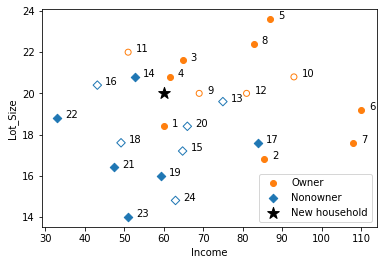

In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

train, valid = train_test_split(df1, test_size=0.4, random_state=26)

new_household = pd.DataFrame([{'Income': 60, 'Lot_Size': 20}])   #클래스를 예측할 새로운 데이터 'new_household'

def plotdataset(ax, data, showLabel=True, facecolors=None):  #facecolors(내부색)의 기본값을 None(값이 없음)으로 설정
    owner_subset = data.loc[data['Ownership']=='Owner']
    nonowner_subset = data.loc[data['Ownership']=='Nonowner']

    #Owner 데이터를 특정 색상과 마커로 플롯
    ax.scatter(owner_subset.Income, owner_subset.Lot_Size, marker='o',
               label='Owner' if showLabel else None, color='C1', facecolors=facecolors or 'C1')
               #showLabel이 True라면 label에 'Owner'를, False라면 'None'을 할당 / #facecolors에 어떠한 값이 제공되었으면 그 값을 사용하고 그렇지 않은 경우 기본 색상 'C1'을 사용

    #Nonowner 데이터를 특정 색상과 마커로 플롯
    ax.scatter(nonowner_subset.Income, nonowner_subset.Lot_Size, marker='D',
               label='Nonowner' if showLabel else None, color='C0', facecolors=facecolors or 'C0')

    #데이터 포인트별로 번호 라벨 추가
    for index in data.index:
        ax.annotate(data.at[index, 'Number'], (data.at[index, 'Income']+2, data.at[index, 'Lot_Size']))
        #annotation(주석)을 표시하는데 숫자는 'Number'열의 값을 사용하고, 위치는 x축은 Income 값+2 위치, y축은 Lot_Size 위치에 표시

fig, ax = plt.subplots()
plotdataset(ax, train)  #트레이닝 데이터셋은 채워진 마커 사용
plotdataset(ax, valid, showLabel=False, facecolors='none')  #검증 데이터셋은 빈 마커('none') 사용
ax.scatter(new_household.Income, new_household.Lot_Size, marker='*',
           label='New household', color='black', s=150)

plt.xlabel('Income')
plt.ylabel('Lot_Size')
ax.legend(loc=4)   #각데이터에서 범례에 해당하는 정보를 자동으로 받아오고 loc=4는 'lower right' 위치를 의미
plt.show()

In [5]:
from sklearn import preprocessing

scale = preprocessing.StandardScaler()
scale.fit(train[['Income', 'Lot_Size']])

df1_stand = pd.concat([pd.DataFrame(scale.transform(df1[['Income','Lot_Size']]),
                                    columns=['zIncome', 'zLot_Size']),
                       df1[['Ownership','Number']]], axis=1)

train_stand = df1_stand.iloc[train.index]
valid_stand = df1_stand.iloc[valid.index]
new_household_stand = pd.DataFrame(scale.transform(new_household),
                                   columns=['zIncome', 'zLot_Size'])

df1_stand

,zIncome,zLot_Size,Ownership,Number
0,-0.477910,-0.174908,Owner,1
1,0.680365,-0.787085,Owner,2
2,-0.259882,1.049447,Owner,3
3,-0.409776,0.743358,Owner,4
4,0.748499,1.814668,Owner,5
5,1.797760,0.131181,Owner,6
6,1.702373,-0.480996,Owner,7
7,0.557724,1.355535,Owner,8
8,-0.069107,0.437269,Owner,9
9,1.021034,0.743358,Owner,10


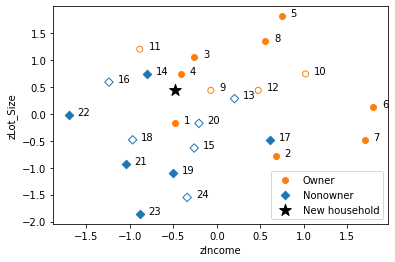

In [6]:
def plotdataset(ax, data, showLabel=True, facecolors=None):  #facecolors(내부색)의 기본값을 None(값이 없음)으로 설정
    owner_subset = data.loc[data['Ownership']=='Owner']
    nonowner_subset = data.loc[data['Ownership']=='Nonowner']

    #Owner 데이터를 특정 색상과 마커로 플롯
    ax.scatter(owner_subset.zIncome, owner_subset.zLot_Size, marker='o',
               label='Owner' if showLabel else None, color='C1', facecolors=facecolors or 'C1')
               #showLabel이 True라면 label에 'Owner'를, False라면 'None'을 할당 / #facecolors에 어떠한 값이 제공되었으면 그 값을 사용하고 그렇지 않은 경우 기본 색상 'C1'을 사용

    #Nonowner 데이터를 특정 색상과 마커로 플롯
    ax.scatter(nonowner_subset.zIncome, nonowner_subset.zLot_Size, marker='D',
               label='Nonowner' if showLabel else None, color='C0', facecolors=facecolors or 'C0')

    #데이터 포인트별로 번호 라벨 추가
    for index in data.index:
        ax.annotate(data.at[index, 'Number'], (data.at[index, 'zIncome']+0.1, data.at[index, 'zLot_Size']))
        #annotation(주석)을 표시하는데 숫자는 'Number'열의 값을 사용하고, 위치는 x축은 Income 값+2 위치, y축은 Lot_Size 위치에 표시

fig, ax = plt.subplots()
plotdataset(ax, train_stand)  #트레이닝 데이터셋은 채워진 마커 사용
plotdataset(ax, valid_stand, showLabel=False, facecolors='none')  #검증 데이터셋은 빈 마커('none') 사용
ax.scatter(new_household_stand.zIncome, new_household_stand.zLot_Size, marker='*',
           label='New household', color='black', s=150)

plt.xlabel('zIncome')
plt.ylabel('zLot_Size')
ax.legend(loc=4)   #각데이터에서 범례에 해당하는 정보를 자동으로 받아오고 loc=4는 'lower right' 위치를 의미
plt.show()

In [7]:
from sklearn.neighbors import NearestNeighbors   #가장 가까운 이웃을 식별하는 것이 주목적

knn = NearestNeighbors(n_neighbors=3)
knn.fit(train_stand[['zIncome', 'zLot_Size']])
distances, indices = knn.kneighbors(new_household_stand)

print(distances)   #new_household_stand와 가장 가까운 3개의 이웃 간 거리
print(indices)   #new_household_stand와 가장 가까운 이웃들의 인덱스
print(train_stand.iloc[indices[0],:])   #train_stand 데이터 중 인덱스 1, 8, 7의 데이터

[[0.31358009 0.44793643 0.61217726]]
[[1 8 7]]
     zIncome  zLot_Size Ownership  Number
3  -0.409776   0.743358     Owner       4
13 -0.804953   0.743358  Nonowner      14
0  -0.477910  -0.174908     Owner       1


In [8]:
train_stand

,zIncome,zLot_Size,Ownership,Number
5,1.797760,0.131181,Owner,6
3,-0.409776,0.743358,Owner,4
7,0.557724,1.355535,Owner,8
20,-1.050235,-0.940129,Nonowner,21
18,-0.505164,-1.093174,Nonowner,19
2,-0.259882,1.049447,Owner,3
4,0.748499,1.814668,Owner,5
0,-0.477910,-0.174908,Owner,1
13,-0.804953,0.743358,Nonowner,14
22,-0.886713,-1.858395,Nonowner,23


In [9]:
from sklearn.neighbors import KNeighborsClassifier   #가장 가까운 이웃의 레이블을 기반으로 새로운 데이터 포인트의 레이블을 예측하는 것이 주목적
from sklearn.metrics import accuracy_score

train_X = train_stand[['zIncome', 'zLot_Size']]
train_y = train_stand['Ownership']
valid_X = valid_stand[['zIncome', 'zLot_Size']]
valid_y = valid_stand['Ownership']

results = []

for k in range(1, 15):
  knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
  results.append({
      'k': k,
      'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
  })

results = pd.DataFrame(results)
results

,k,accuracy
0,1,0.6
1,2,0.7
2,3,0.8
3,4,0.9
4,5,0.7
5,6,0.9
6,7,0.9
7,8,0.9
8,9,0.9
9,10,0.8


In [10]:
valid_X

,zIncome,zLot_Size
12,0.203428,0.284225
14,-0.259882,-0.634041
11,0.475964,0.437269
8,-0.069107,0.437269
15,-1.241009,0.590314
10,-0.886713,1.202491
17,-0.968474,-0.480996
19,-0.205375,-0.174908
23,-0.341643,-1.552307
9,1.021034,0.743358
